In [2]:
# Initialize Otter
import otter
grader = otter.Notebook("hw05.ipynb")

# Homework 5

## Due on Gradescope

## Collaboration Policy

Data science is a collaborative activity. However a key step in learning and retention is creating solutions on your own.

Please see the Course Syllabus for the Collaboration Policy.

The following are some examples of things which would NOT usually be considered to be cheating:

Working on a HW problem on your own first and then discussing with a classmate a particular part in the problem solution where you are stuck. After clarifying any questions you should then continue to write your solution independently.
Asking someone (or searching online) how a particular construct in the language works.
Asking someone (or searching online) how to formulate a particular construct in the language.
Asking someone for help in finding an error in your program.
Asking someone why a particular construct does not work as you expected in a given program.
To test whether you are truly doing your own work and retaining what you've learned you should be able to easily reproduce from scratch and explain a HW solution that was your own when asked in office hours by an Instructor or on a quiz/exam.

If you have difficulty in formulating the general solution to a problem on your own, or you have difficulty in translating that general solution into a program, it is advisable to see your instructor.

We are here to help! Visit Office Hours and/or post questions on Piazza!

If while completing this assignment you reference any websites other than those linked in this assignment or provided on Canvas please list those references here:

**External references**:  *list any websites you referenced

#### Grading
Grading is broken down into autograded answers and manually graded answers. 

For autograded answers, the results of your code are compared to provided and/or hidden tests.

For manually graded answers you must show and explain all steps.  Graders will evaluate how well you answered the question and/or fulfilled the requirements of the question.


### Score breakdown



Question | Points | Grading Type
--- | --- | ---
Question 1 | 7 | autograded
Question 2acef | 11 | manual
Question 2bd | 5 | autograded
Question 3 | 10 | manual
Question 4abc | 3| autograded
Question 4deg | 11 | manual
Question 4f | 3 | autograded
|Total | 50


## Recommended Readings for this HW:

- [CS109 Course Reader: Random Variables](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/rvs/)
- [CS109 Course Reader: Probability Mass Functions (PMF)](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/pmf/)
- [CS109 Course Reader: Expectation](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/expectation/)
- [CS109 Course Reader: Variance](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/variance/)
- [CS109 Course Reader: Bernoulli Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/bernoulli/)
- [CS109 Course Reader: Binomial Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/binomial/)
- [CS109 Course Reader: Poisson Distribution](https://chrispiech.github.io/probabilityForComputerScientists/en/part2/poisson/)
- [100 Binomial Question](https://chrispiech.github.io/probabilityForComputerScientists/en/examples/100_binomial_problems/)

<a id='top'></a>
---
**Shortcuts:**  [Problem 2](#p2) | [Problem 3](#p3) | [Problem 4](#p4) | 
---
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



In this HW we explore properties of probability distributions, both theoretically and through simulation.

In [3]:

import pandas as pd
import numpy as np
import hashlib
import matplotlib.pylab as plt
%matplotlib inline


def get_hash(num):
    """Helper function for assessing correctness"""
    return hashlib.md5(str(num).encode()).hexdigest()



### Question 1

Factorials and the *binomial coefficients* $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ get large very quickly as $n$ gets large. One way to compute them is to use the `SciPy` module `special`. `SciPy` is a collection of Python-based software for math, probability, statistics, science, and engineering.

In [4]:
from scipy import special

Below are some examples of `special.factorial`:

In [5]:
special.factorial(5)

special.factorial(range(1, 6))

array([  1.,   2.,   6.,  24., 120.])

Traditionally, subsets of $k$ individuals out of a population of $n$ individuals are called *combinations*, and so `special.comb(n, k)` evaluates to $\binom{n}{k}$. 

Note that we will always use the term *subsets* to mean un-ordered sets. We will use *permutations* in situations where we need to keep track of the order in which the elements appear.


Look at the code and output below carefully (including types) before starting Question 1.


https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.comb.html



In [6]:
special.comb(5, 3), special.factorial(5) / (special.factorial(3) * special.factorial(2))

(10.0, 10.0)

In [7]:
special.comb(5, range(6))

array([ 1.,  5., 10., 10.,  5.,  1.])

Consider a population in which a proportion $p$ of individuals are called "successes" (or 1, if you prefer) and the remaining proportion are rudely called "failures" (or 0).

As we saw in lecture, if you draw a sample of size $n$ (where $n$ is some positive integer) at random with replacement from the population, then the number of successes is a random variable that follows the binomial distribution. The probability of drawing $k$ successes and $n-k$ failures is $\binom{n}{k}p^k(1-p)^{n-k}$, for $0 \leq k \leq n$. To reduce writing, we will shorten "$k$ successes and $n-k$ failures" to "$k$ successes". In other words, "$k$ successes" means "exactly $k$ successes".

To formalize notation: if $X$ is the number of successes we draw, then $P(X = k) = \binom{n}{k}p^k(1-p)^{n-k}$.

### Question 1a) ###
Suppose you sample 100 times at random with replacement from a population in which 26% of the individuals are successes. Write a Python expression that evaluates to the chance that the sample has 20 successes. 

**Computational note:** Don't import any other libraries; just use the ones already imported and plug into the formula above. It's far from the best way numerically, but it is fine for the numbers involved in this Homework. 

In [8]:
prob_1a = special.comb(100,20)*((0.26**20)*(0.74**80))
prob_1a

0.03691100356002463

In [9]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b) ###
Complete the cell with a Python expression that evaluates to an array whose elements are the chances of $k$ successes for $k = 0, 1, 2, \ldots, 100$. That is, `all_probs[k]` should contain $P(X = k)$, where $X$ is the random variable describing the number of successes drawn from the scenario outlined above.

In [10]:
k = np.arange(101)
all_probs = special.comb(100,k)*(0.26**k)*((0.74)**(100-k))
np.round(all_probs, 4), sum(all_probs)

(array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.0001, 0.0003, 0.0007, 0.0016, 0.0033,
        0.0061, 0.0106, 0.0171, 0.0259, 0.0369, 0.0494, 0.0623, 0.0743,
        0.0837, 0.0894, 0.0906, 0.0873, 0.0799, 0.0697, 0.058 , 0.046 ,
        0.0349, 0.0252, 0.0175, 0.0116, 0.0073, 0.0045, 0.0026, 0.0015,
        0.0008, 0.0004, 0.0002, 0.0001, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    ]),
 0.9999999999999994)

In [11]:
grader.check("q1b")

q1b results: All test cases passed!

Using the array of probability values we can plot a histogram of this discrete probability distribution as follows.

**NOTE:** We set the bin widths to be equal to 1 and add white lines between each value so that we can interpret area in the histogram as probabilities.

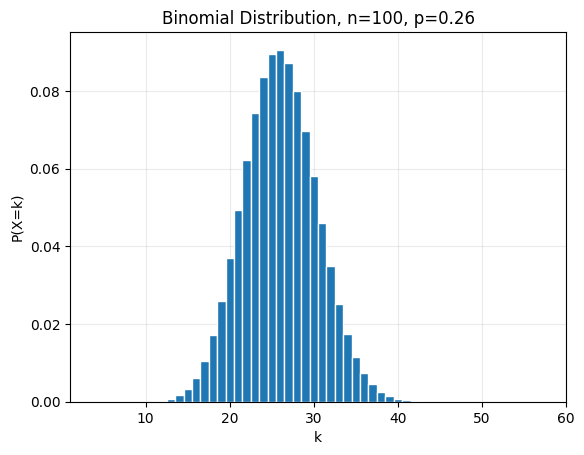

In [12]:
k = np.arange(101)
p = special.comb(100, k)*(0.26**k)*(0.74**(100-k))


fig, ax = plt.subplots()

ax.bar(k, p, width=1, ec='white');
ax.set_axisbelow(True)
ax.grid(alpha=0.25)
plt.xlim(1,60)
#Always label your x-axis
plt.xlabel("k")
#Always label your y-axis
plt.ylabel("P(X=k)")

#Always include a title
plt.title("Binomial Distribution, n=100, p=0.26");



### Question 1c) ###


Complete the cell with an expression that evaluates to the chance that the number of successes in the sample is in the interval $26 \pm 10$ (inclusive on both sides). In other words, determine $P(16 \leq X \leq 36)$. **Hint: You might want to apply your Python indexing knowledge here.**

**Note: Please assign your answer to `prob_1c`. Because we use an autograder, please make sure your answer is a proportion between 0 and 1, not a percent between 0 and 100.**

In [13]:
prob_1c = sum(all_probs[16:37])


In [14]:
grader.check("q1c")

q1c results: All test cases passed!

Consider (once again) a sample of size $n$ drawn at random with replacement from a population in which a proportion $p$ of the individuals are called successes.

Let $S$ be the random variable that denotes the number of successes in our sample. (As stated above, $S$ follows the binomial distribution.) Then, the probability that the number of successes in our sample is **at most** $s$ (where $0 \leq s \leq n$) is

$$P(S \leq s) = P(S = 0) + P(S = 1) + ... + P(S = s) = \sum_{k=0}^s \binom{n}{k}p^k(1-p)^{n-k}$$

We obtain this by summing the probability that the number of successes is exactly $k$, for each value of $k = 0, 1, 2, ..., s$.

### Question 1d) ###

Please fill in the function `prob_at_most` which takes $n$, $p$, and $s$ and returns $P(S \le s)$ as defined above. If the inputs are invalid: for instance, if $p > 1$ OR $s > n$ then return 0." 

It might help to refer to the calculation in Question 1b.

In [15]:
def prob_at_most(n, p, s):
    """ 
    returns the probability of S <= s
    Input n: sample size; p : proportion; s: number of successes at most"""
    if p > 1 or s > n:
        return 0
    return sum([special.comb(n,k) * p ** k * (1-p) ** (n-k) for k in range(s+1)])
    # Your code above this line

In [16]:
grader.check("q1d")

q1d results: All test cases passed!

### Question 1e) ###
In an election, supporters of Candidate C are in a minority. Only 45% of the voters in the population favor the candidate.

Suppose a survey organization takes a sample of 200 voters at random with replacement from this population. Use `prob_at_most` to write an expression that evaluates to the chance that a majority (more than half) of the sampled voters favor Candidate C.

In [17]:
p_majority = 1 - prob_at_most(200, 0.45, 100)
p_majority

0.06807524986263847

In [18]:
grader.check("q1e")

q1e results: All test cases passed!

### Question 1f) ###
Suppose each of five survey organizations takes a sample of voters at random with replacement from the population of voters in Part **e**, independently of the samples drawn by the other organizations. 

- Three of the organizations use a sample size of 200
- One organization uses a sample size of 300
- One organization uses a sample size of 400

Write an expression that evaluates to the chance that in at least one of the five samples the majority of voters favor Candidate C. You can use any quantity or function defined earlier in this exercise.

In [19]:
prob_1f = 1 - (((prob_at_most (200, 0.45, 100)) ** 3) * prob_at_most (300, 0.45, 150) * prob_at_most (400, 0.45, 200))
prob_1f

0.23550361568442357

In [20]:
grader.check("q1f")

q1f results: All test cases passed!

***

[Back to top](#top)

<a id='p2'></a>

### Question 2 - Simulating Roulette


A Las Vegas roulette wheel contains 38 numbers $\{0, 00, 1, 2, \ldots, 36\}$. Of the non-zero numbers, 18 are red and 18 are black. You can place bets on various number/color combinations and each type of bet pays-out at a different rate.  For example: 

- If you bet $\$1$ on red (or black) and win, then you win $\$1$ (i.e. you get your original dollar back, plus another dollar). 
- If you bet $\$1$ any particular number and win, then you win $\$35$ (i.e you get your original dollar back, plus $\$35$). 
- If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 

<img src="img/roulette_wheel.jpeg" width="330px">

It seems like there are so many ways to win!  In reality, some very careful probability theory was done by the game designers to ensure that there is not much difference in any particular payout.  We'll explore roulette both by simulation and by hand in this exercise. 

<!-- BEGIN QUESTION -->

### Question 2a) ### 

Let $X$ be a random variable that gives your net winnings if you bet on red and the roulette wheel is spun once.   

i).  What is the probability distribution of $X$?  Give your answer as a table. 

ii).  Calculate the expected value of your net winnings by betting on red.   

iii). Calculate the variance of your net winnings by betting on red.

Write up your full solution to all 3 parts in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  


i) The probability distribution of your winnings, X, can be represented as follows:

| X | P(X) |
|---|------|
| 1 | 18/38 |
|-1 | 20/38 |

ii) The expected value of your winnings, E(X), can be calculated as follows:

E(X) = ∑ [x * P(X = x)]

= (1 * (18/38)) + (-1 * (20/38))

= 18/38 - 20/38

= -2/38

= -1/19

iii)

The variance of net winnings is given by:

$$
\text{Var}(X) = E[X^2] - (E[X])^2
$$


$$
E[X^2] = (1^2 \times \frac{18}{38}) + ((-1)^2 \times \frac{20}{38}) = 1
$$

$$
E[X] = (1 \times \frac{18}{38}) + (-1 \times \frac{20}{38}) = -\frac{1}{19}
$$

$$
\text{Var}(X) = 1 - \left(-\frac{1}{19}\right)^2 = \frac{360}{361} \approx 0.997
$$



<!-- END QUESTION -->

### Question 2b) ### 

Let's simulate this.  In the first code box below, write code to simulate one spin of a roulette wheel. Your code should take in a single variable `num_spins` and return an array of roulette spins of that length **WITHOUT USING A LOOP**.  Your output should be an array of strings in the form of the number then the color (i.e. `array(['18R', '00G',...])`) 

In the 2nd code box below, write code that takes the number of spins and either the color red or black as input, calculates winnings for each spin assuming you bet on that color for all spins, and then outputs the average winnings out of those spins.  

Then run the simulation for `num_spins` = 10,000,000  and compare to your answer from part A.

**To receive credit you must write your code such that all lines are visible in your PDF output.**

In [21]:
def spin_roulette(num_spins): 
    # Create wheel:
    red = [str(ii)+"R" for ii in [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]] 
    black = [str(ii)+"B" for ii in [2,4,6,8,10,11,13,15,17,20,22,24,26,28,29,31,33,35]]
    green = [str(ii)+"G" for ii in ["0", "00"]]

    wheel = red+black+green

    return np.random.choice(wheel, size=num_spins)

# Your code above this line

spin_roulette(5)


array(['21R', '26B', '6B', '27R', '8B'], dtype='<U3')

In [22]:
def color_winnings(color='R', num_spins=100000):

    spins = spin_roulette(num_spins)
    
    winnings = np.where(np.char.endswith(spins, color), 1, -1)
    
    return np.mean(winnings)
    
print("E[Winnings] = {:.3f}".format(color_winnings(color="R", num_spins=int(1e7))))

E[Winnings] = -0.053


In [23]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 2c) ### 

In Roulette you can bet on one of three "dozens" segments, called 1st 12, 2nd 12, and 3rd 12. They cover 1-12, 13-24, and 25-36, respectively.   If you bet $\$1$ on the first dozen (or second dozen, or third dozen) nonzero numbers and win, then you win $\$2$ (i.e. you get your original dollar back, plus another $\$2$. 


Let $Y$ be a random variable that gives your net winnings if you bet on any one of the three "dozen" nonzero numbers and the roulette wheel is spun once.  

i).  What is the probability distribution of $Y$?  Give your answer as a table. 

ii).  What is $E[Y]$?

iii). What is $Var[Y]$?

Write up your full solution to all 3 parts above in the SAME box below using LaTeX (not code).  Show all steps fully justifying your answer.  

### i) Probability Distribution of \( Y \)

When betting on one of the dozens (e.g., 1st 12, 2nd 12, or 3rd 12), the possible outcomes are as follows:
- If the ball lands on one of the 12 numbers in your selected dozen, you win $2 (net gain ( Y = 2 )).

- If the ball lands on any other number (the other two dozens, or the green "0" and "00"), you lose $1 (net loss ( Y = -1 )).


The probabilities of each outcome are:
- Winning: There are 12 winning outcomes in your chosen dozen out of the 38 total numbers. Thus, 

$$
P(Y = 2) = \frac{12}{38}
$$

- Losing: There are 

$$
38 - 12 = 26 
$$

losing outcomes. Thus,

$$
P(Y = -1) = \frac{26}{38}
$$

### ii) Expected Value of \( Y \)

The expected value $$( \mathbb{E}[Y])$$ is calculated as:

$$
\mathbb{E}[Y] = \sum_{y} y \cdot P(Y = y)
$$

Substitute the values:

$$
\mathbb{E}[Y] = (2 \cdot \frac{12}{38}) + (-1 \cdot \frac{26}{38})
$$

Simplify:

$$
\mathbb{E}[Y] = \frac{24}{38} - \frac{26}{38}
$$

$$
\mathbb{E}[Y] = \frac{-2}{38} = -\frac{1}{19}
$$

Thus, the expected value is:

$$
\mathbb{E}[Y] = -\frac{1}{19}
$$

---

### iii) Variance of \( Y \)

The variance is given by:

$$
\text{Var}(Y) = \mathbb{E}[Y^2] - (\mathbb{E}[Y])^2
$$

First, calculate:

$$
\mathbb{E}[Y^2] = \sum_{y} y^2 \cdot P(Y = y)
$$

Substitute the values:

$$
\mathbb{E}[Y^2] = (2^2 \cdot \frac{12}{38}) + ((-1)^2 \cdot \frac{26}{38})
$$

$$
\mathbb{E}[Y^2] = (4 \cdot \frac{12}{38}) + (1 \cdot \frac{26}{38})
$$

$$
\mathbb{E}[Y^2] = \frac{48}{38} + \frac{26}{38} = \frac{74}{38}
$$

Now calculate $$( \text{Var}(Y) )$$:

$$
\text{Var}(Y) = \frac{74}{38} - \left(-\frac{1}{19}\right)^2
$$

$$
\text{Var}(Y) = \frac{74}{38} - \frac{1}{361}
$$

$$
\text{Var}(Y) = \frac{2666}{1334}
$$

---

Let me know if you'd like any part clarified further!


<!-- END QUESTION -->

### Question 2d) ### 

Write code to simulate `num_spins` spins, record the winnings for each spin if you bet on the first dozen nonzero numbers, and calculate the average winnings out of the total spins.

Then run the simulation for `num_spins` = 10,000,000  and compare to your answer from part C.  


In [24]:
def dozen_winnings(num_spins):

    red = [str(ii) + "R" for ii in [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36]]
    black = [str(ii) + "B" for ii in [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]]
    green = ["0G", "00G"]
    
    wheel = np.array(red + black + green)
    
    spins = np.random.choice(wheel, size=num_spins)
    
    first_dozen_numbers = {str(ii) for ii in range(1, 13)}
    winnings = np.array([
        2 if spin[:-1] in first_dozen_numbers else -1  
        for spin in spins
    ])
    
    return np.mean(winnings)
    
print("E[Winnings] = {:.3f}".format(dozen_winnings(num_spins=int(1e7))))


E[Winnings] = -0.053


In [25]:
grader.check("q2d")

q2d results: All test cases passed!

<!-- BEGIN QUESTION -->

 ### Question 2e) ###  
Recall, we showed in class that the expected winnings if you bet on any number is also $-\dfrac{1}{19}$.    

So  you're hopefully onto the pattern by now.  The payouts in Roulette are designed so that the expected payout for a winning bet is always $-\dfrac{1}{19}$.  

Since we define these payouts in terms of your winnings after betting $1, we can think of these as payout odds.  

For example, since if you bet $\$1$ on the first dozen nonzero numbers and win, then you win $\$2$, we say the odds are 2 to 1 (denoted 2:1).   

The odds are 35:1 for landing on any particular number.  This means if you bet $\$1$, you’ll win $35.
 
 
Suppose the casino wanted to develop odds for a new bet in Roulette, where they allow you to bet on any set of 3 different numbers.   Let the odds for this new bet be $$x:1$$ What should $x$ be so that the expected payout for a winning bet is still $-\dfrac{1}{19}$?.

Show your work using LaTeX below.  

### Solution

Let \( Y \) represent the net winnings from the new bet on any set of 3 numbers. The expected winnings \( \mathbb{E}[Y] \) for a single spin are given by:

$$
\mathbb{E}[Y] = \sum_{y} y \cdot P(Y = y)
$$

The possible outcomes of the new bet are:
1. You win \( x \) (net gain \( Y = x \)) if the ball lands on one of the 3 chosen numbers.
2. You lose \( 1 \) (net loss \( Y = -1 \)) if the ball lands on any of the other numbers.

The probabilities of these outcomes are:
- Winning: \( P(Y = x) = \frac{3}{38} \) (3 chosen numbers out of 38 total numbers).
- Losing: \( P(Y = -1) = \frac{35}{38} \) (the remaining 35 numbers out of 38 total numbers).

Thus, the expected value of \( Y \) is:

$$
\mathbb{E}[Y] = (x \cdot P(Y = x)) + (-1 \cdot P(Y = -1))
$$

Substitute the probabilities:

$$
\mathbb{E}[Y] = \left(x \cdot \frac{3}{38}\right) + \left(-1 \cdot \frac{35}{38}\right)
$$

Simplify:

$$
\mathbb{E}[Y] = \frac{3x}{38} - \frac{35}{38}
$$

We are given that the expected payout is $$( \mathbb{E}[Y] = -\frac{1}{19} $$) Thus:

$$
\frac{3x}{38} - \frac{35}{38} = -\frac{1}{19}
$$

Multiply through by 38 to eliminate the denominator:

$$
3x - 35 = -2
$$

Solve for \( x \):

$$
3x = 33
$$

$$
x = 11
$$

---

### Final Answer

The odds for the new bet should be:

$$
11:1
$$

to ensure the expected payout remains $$( -\frac{1}{19} $$).


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

 ### Question 2f) ###  
Let's generalize this!   

Define a function $x(n)$ that describes the odds the casino should give for betting $\$1$ on any set of $n$ numbers if the casino wants to keep the expected payout for a winning bet at $-\frac{1}{19}$ for any $n$.   (For example, the odds for betting on any 3 different numbers should be set at $x(3)$ to $1$.  The odds for betting on any 4 different numbers should be set at $x(4)$ to $1$).   

Write your solution in the cell below:


### Generalization of Odds for Betting on \( n \) Numbers

To calculate the odds \( x(n) \) for betting $1 on any set of \( n \) numbers, we follow these steps:

1. **Winning Probability**:
   The probability of winning is:
   $$
   P(\text{Win}) = \frac{n}{38}
   $$

2. **Losing Probability**:
   The probability of losing is:
   $$
   P(\text{Loss}) = \frac{38 - n}{38}
   $$

3. **Expected Winnings**:
   The expected value of the net winnings is:
   $$
   \mathbb{E}[Y] = \left(x(n) \cdot \frac{n}{38}\right) - \frac{38 - n}{38}
   $$

4. **Set Expected Winnings**:
   Since the casino wants the expected winnings to be \( -\frac{1}{19} \), we set:
   $$
   \frac{n \cdot x(n)}{38} - \frac{38 - n}{38} = -\frac{1}{19}
   $$

5. **Solve for \( x(n) \)**:
   Multiply through by 38 to simplify:
   $$
   n \cdot x(n) - (38 - n) = -2
   $$
   Simplify further:
   $$
   n \cdot x(n) = 36 - n
   $$
   Solve for \( x(n) \):
   $$
   x(n) = \frac{36 - n}{n}
   $$

---

### Final Formula

The odds for betting on any set of \( n \) numbers are:
$$
x(n):1 = \frac{36 - n}{n}:1
$$



<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p3'></a>

### Question 3


Consider the discrete random variable $X$, with probability distribution given by $P(X=k) = 2ak^2-2ak$ for $k = 2, 3, 4$, where $a$ is a constant.


<!-- BEGIN QUESTION -->

Answer all of the parts below in the SAME cell below using LaTeX.  Show all of your steps.  

**3a**).  Determine the value of $a$ such that this defines a valid probability distribution.  Use that value for the rest of the problem.  

**3b**).  Calculate $P(X\leq3)$.

**3c**).  What is $E[X]$? (Show steps calculating this).

**3d**).  What is the standard deviation of $X$? (Show all steps calculating this).

Answer all of the parts above in SINGLE cell provided below using LaTeX.

### Question 3

Consider the discrete random variable \( X \), with probability distribution given by:

$$
P(X = k) = 2a k^2 - 2a k
$$

for \( k = 2, 3, 4 \), where \( a \) is a constant.

---

### 3a)

For \( P(X = k) \) to be a valid probability distribution, the sum of all probabilities must equal 1:

$$
\sum_{k=2}^{4} P(X = k) = 1
$$

Substitute \( P(X = k) = 2a k^2 - 2a k \):

$$
P(X = 2) + P(X = 3) + P(X = 4) = 1
$$

Calculate each term:

$$
P(X = 2) = 2a (2^2) - 2a (2) = 8a - 4a = 4a
$$

$$
P(X = 3) = 2a (3^2) - 2a (3) = 18a - 6a = 12a
$$

$$
P(X = 4) = 2a (4^2) - 2a (4) = 32a - 8a = 24a
$$

The sum is:

$$
4a + 12a + 24a = 1
$$

Simplify:

$$
40a = 1
$$

Solve for \( a \):

$$
a = \frac{1}{40}
$$

Thus, the value of \( a \) is:

$$
a = \frac{1}{40}
$$

---

### 3b)

The probability \( P(X \leq 3) \) is:

$$
P(X \leq 3) = P(X = 2) + P(X = 3)
$$

Substitute:

$$
P(X = 2) = 4a = 4 \cdot \frac{1}{40} = \frac{1}{10}
$$

$$
P(X = 3) = 12a = 12 \cdot \frac{1}{40} = \frac{3}{10}
$$

Add the probabilities:

$$
P(X \leq 3) = \frac{1}{10} + \frac{3}{10} = \frac{4}{10} = \frac{2}{5}
$$

Thus:

$$
P(X \leq 3) = \frac{2}{5}
$$

---

### 3c)

The expected value is given by:

$$
\mathbb{E}[X] = \sum_{k=2}^{4} k \cdot P(X = k)
$$

Substitute:

$$
\mathbb{E}[X] = (2 \cdot P(X = 2)) + (3 \cdot P(X = 3)) + (4 \cdot P(X = 4))
$$

Using:

$$
P(X = 2) = \frac{1}{10}, \, P(X = 3) = \frac{3}{10}, \, P(X = 4) = \frac{6}{10}
$$

Substitute values:

$$
\mathbb{E}[X] = (2 \cdot \frac{1}{10}) + (3 \cdot \frac{3}{10}) + (4 \cdot \frac{6}{10})
$$

Simplify:

$$
\mathbb{E}[X] = \frac{2}{10} + \frac{9}{10} + \frac{24}{10}
$$

$$
\mathbb{E}[X] = \frac{2 + 9 + 24}{10} = \frac{35}{10} = 3.5
$$

Thus:

$$
\mathbb{E}[X] = 3.5
$$

---

### 3d)

The standard deviation is:

$$
\text{SD}(X) = \sqrt{\text{Var}(X)}
$$

The variance is:

$$
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$


$$
\mathbb{E}[X^2] = \sum_{k=2}^{4} k^2 \cdot P(X = k)
$$

Substitute:

$$
\mathbb{E}[X^2] = (2^2 \cdot P(X = 2)) + (3^2 \cdot P(X = 3)) + (4^2 \cdot P(X = 4))
$$

$$
\mathbb{E}[X^2] = (4 \cdot \frac{1}{10}) + (9 \cdot \frac{3}{10}) + (16 \cdot \frac{6}{10})
$$

Simplify:

$$
\mathbb{E}[X^2] = \frac{4}{10} + \frac{27}{10} + \frac{96}{10}
$$

$$
\mathbb{E}[X^2] = \frac{4 + 27 + 96}{10} = \frac{127}{10} = 12.7
$$


$$
\text{Var}(X) = \mathbb{E}[X^2] - (\mathbb{E}[X])^2
$$

Substitute:

$$
\text{Var}(X) = 12.7 - (3.5)^2
$$

$$
\text{Var}(X) = 12.7 - 12.25 = 0.45
$$


$$
\text{SD}(X) = \sqrt{\text{Var}(X)} = \sqrt{0.45}
$$

$$
\text{SD}(X) \approx 0.671
$$

---

### Final Results

- **3a**: \( a = \frac{1}{40} \)
- **3b**: \( P(X \leq 3) = \frac{2}{5} \)
- **3c**: \( \mathbb{E}[X] = 3.5 \)
- **3d**: \( \text{SD}(X) \approx 0.671 \)


<!-- END QUESTION -->

To check your answers to 3c and 3d, enter them below.  Note that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [26]:
expected_value = 3.5
standard_deviation= 

In [45]:
grader.check("q3_check")

q3_check results:
    q3_check - 1 result:
        ✅ Test case passed

    q3_check - 2 result:
        ❌ Test case failed
        Trying:
            assert np.isclose(standard_deviation, np.sqrt(9/20))
        Expecting nothing
        **********************************************************************
        Line 2, in q3_check 1
        Failed example:
            assert np.isclose(standard_deviation, np.sqrt(9/20))
        Exception raised:
            Traceback (most recent call last):
              File "/opt/conda/lib/python3.10/doctest.py", line 1350, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest q3_check 1[0]>", line 1, in <module>
                assert np.isclose(standard_deviation, np.sqrt(9/20))
            AssertionError

<!-- BEGIN QUESTION -->

### Question 3e

Plot a histogram of the discrete probability distribution for $X$.  

Use the same plotting guidelines as shown in Problem 1 so we can interpret area in the histogram as representing probability: 
 - Set the bin widths to be equal to 1 
 - Add white lines between each bar 

**Be sure to include a title and label your x and y axes on your plot.**


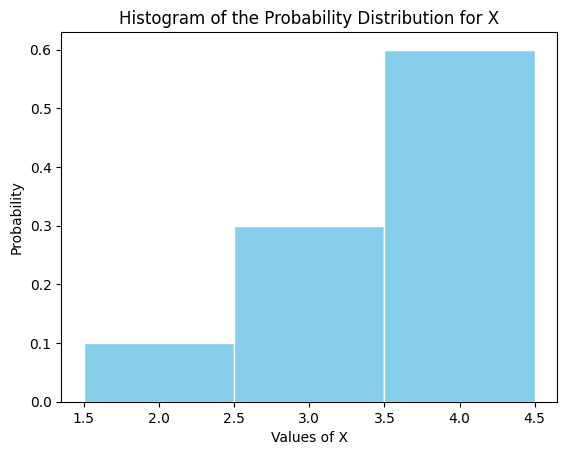

In [28]:
import numpy as np
import matplotlib.pyplot as plt


a = 1 / 40  # Value of 'a' from part 3a
probabilities = [4 * a, 12 * a, 24 * a]  # P(X = 2), P(X = 3), P(X = 4)
values = [2, 3, 4]  # Discrete values of X

plt.bar(
    values,
    probabilities,
    width=1.0,  # Bin width set to 1
    edgecolor="white",  # White lines between bars
    color="skyblue",  # Bar color
)


plt.title("Histogram of the Probability Distribution for X")
plt.xlabel("Values of X")
plt.ylabel("Probability")

# Show the plot
plt.show()


# Your code for the histogram above this line


<!-- END QUESTION -->

***

[Back to top](#top)

<a id='p4'></a>


### Question 4


You are waiting in line at the grocery store. It is taking _forever_!  There are only two lines open; one is being tended by a cashier named [John Henry](https://en.wikipedia.org/wiki/John_Henry_(folklore)), and the other is tended by a [self check-out machine](https://theconversation.com/the-economics-of-self-service-checkouts-78593). Like all human beings when they arrive at the front of the store to check-out and encounter lines everywhere, you first experience a moment of intense panic. _Which line will be the fastest?_ you wonder, as people shuffle around you.

You decide you need to model the arrival of customers at the front of each of the lines.  If you haven't already, read the [required textbook reading on the Poisson Distribution].(https://chrispiech.github.io/probabilityForComputerScientists/en/part2/poisson/)  

From your Intro to Data Science class you remember that the distribution of independent random arrivals is often modeled using a Poisson distribution.  You observe the following:
* John's line checks-out an average of 4 customers per ten minutes,
* the self check-out machine checks-out an average of 5 customers per ten minutes **if** the machine is working properly, 
* the self check-out machine checks-out an average of 1 customer per ten minutes if the machine is freezing up, and
* in any given moment, the self check-out machine has a probability of 0.1 of freezing up.

Answer the following questions about this scenario. 

### Question 4a).  
What is the probability that exactly 6 customers pass through John's line in the next 10 minutes? 

In [29]:
import math

# One-line function for Poisson probability 
prob_q4 = lambda k, lambd: (math.exp(-lambd) * lambd**k) / math.factorial(k)

q4a = prob_q4(6, 4)

q4a

0.1041956345670211

In [30]:
grader.check("q4a")

q4a results: All test cases passed!

### Question 4b).  
What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, given that it is working?  

In [31]:
q4b = prob_q4(6, 5)
q4b


0.1462228081398756

In [32]:
grader.check("q4b")

q4b results: All test cases passed!

### Question 4c).
What is the probability that exactly 6 customers pass through the self check-out in the next 10 minutes, given that it is frozen? 


In [33]:
q4c = prob_q4(6,1)

q4c

0.0005109436682936699

In [34]:
grader.check("q4c")

q4c results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4d).  What is the probability that the self check-out tends exactly 6 customers in the next 10 minutes?
Show all steps in the cell below using LaTeX.


**Question 4d**: What is the probability that the self-checkout tends exactly 6 customers in the next 10 minutes?

We have two scenarios to consider:
- When the self-checkout is working, the average rate of customers is \( \lambda = 5 \).
- When the self-checkout is frozen, the average rate of customers is \( \lambda = 1 \).

The self-checkout has a probability of \( 0.1 \) of freezing up at any given moment, and a probability of \( 0.9 \) of working properly.

### Step 1: Calculate the Poisson probability when the self-checkout is working:

The Poisson probability formula is:

$$
P(X = k) = \frac{e^{-\lambda} \lambda^k}{k!}
$$

For \( k = 6 \) customers and \( \lambda = 5 \):

$$
P(X = 6 \mid \text{working}) = \frac{e^{-5} 5^6}{6!}
$$

First, calculate the factorial of 6:

$$
6! = 6 \times 5 \times 4 \times 3 \times 2 \times 1 = 720
$$

Now, compute \( 5^6 \):

$$
5^6 = 15625
$$

Next, compute \( e^{-5} \):

$$
e^{-5} \approx 0.006737
$$

Now, calculate the probability:

$$
P(X = 6 \mid \text{working}) = \frac{(0.006737)(15625)}{720} \approx 0.147
$$

### Step 2: Calculate the Poisson probability when the self-checkout is frozen:

For \( k = 6 \) customers and \( \lambda = 1 \):

$$
P(X = 6 \mid \text{frozen}) = \frac{e^{-1} 1^6}{6!}
$$

We already know that \( 6! = 720 \) and \( 1^6 = 1 \). We also know that \( e^{-1} \approx 0.367879 \).

Now, calculate the probability:

$$
P(X = 6 \mid \text{frozen}) = \frac{(0.367879)(1)}{720} \approx 0.000511
$$

### Step 3: Total probability

The total probability is the sum of the probabilities from both cases, weighted by the probability of each scenario:

$$
P(X = 6) = P(X = 6 \mid \text{working}) \times P(\text{working}) + P(X = 6 \mid \text{frozen}) \times P(\text{frozen})
$$

Substitute the values:


$$
P(X = 6) = (0.147 \times 0.9) + (0.000511 \times 0.1)
$$

$$
P(X = 6) = 0.1323 + 0.0000511 \approx 0.1324
$$

### Final Answer:

The probability that the self-checkout tends exactly 6 customers in the next 10 minutes is approximately:

$$
P(X = 6) \approx 0.1324 \quad \text{(or 13.24%)}.
$$


<!-- END QUESTION -->

To check your answers to 4, enter it below.  Note that to receive credit for your answers you must show work above,  that this autograder test is not worth any points, it's just for you to check your work above to make sure you're on the right track. 

In [35]:
q4d_check = (prob_q4(6, 5) * 0.9) + (prob_q4(6, 1) * 0.1)

q4d_check

0.1316516216927174

In [36]:
grader.check("q4d_check")

q4d_check results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4e) ###
S'pose John is working a 5-hour shift from 4-9 PM after school. He gets no breaks, because the year is 1870 and worker's rights is not yet a thing.  

Plot a histogram of the probability mass function (pmf) of the number of customers he serves in his 5 hour shift.   
For the **domain of the histogram, include $x$ values between $80$ and $160$ in your plot.**

Be sure to include labels for your x and y axes and a title for your plot.

**Hint:** Python has a built-in function to calculate the Poisson distribution for different values of $\lambda$.  See the documentation for `poisson.pmf` in `scipy.stats`  (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

**Hint:**  Since we are changing the time interval over which we are counting customers, you will need to update the parameter $\lambda$ in the Poisson distribution to be the average number of customers John can serve in a $5$-hour shift. **You can assume that his rate of 4 customers per 10 minutes scales up consistently during his 5 hour shift.**  



In [37]:
from scipy.stats import poisson

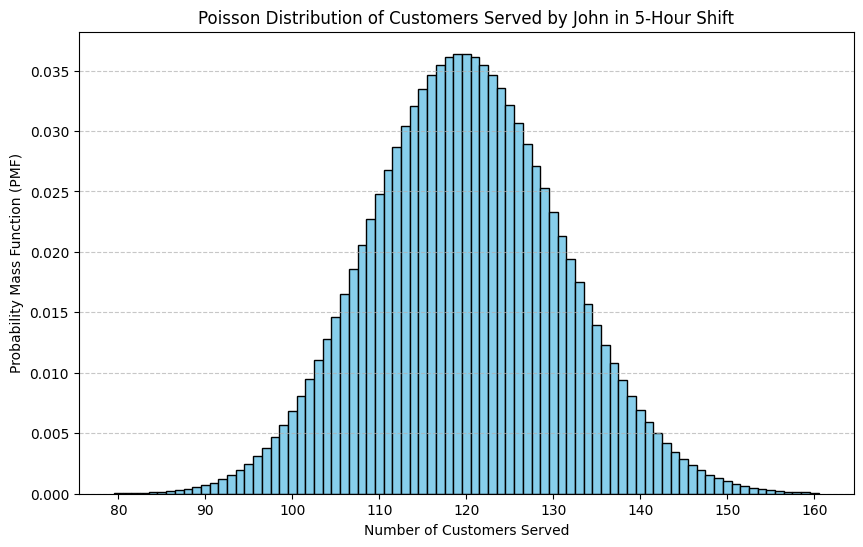

In [38]:

service_5hr = 120  


x_values = np.arange(80, 161)  # x between 80 and 160

# Calculate the Poisson PMF for each x value
pmf_values = poisson.pmf(x_values, service_5hr)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x_values, pmf_values, width=1, edgecolor='black', color='skyblue')

# Adding labels and title
plt.title("Poisson Distribution of Customers Served by John in 5-Hour Shift")
plt.xlabel("Number of Customers Served")
plt.ylabel("Probability Mass Function (PMF)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# your code above this line

<!-- END QUESTION -->

### Question 4f) ###

Calculate  the probability that John serves 100 or more customers during his **5-hour** shift.  Note for this problem do the calculation of the actual probability, not a simulation.   Assign your output to the variable `prob_100_or_more`.
Assume we can safely scale our data assumptions up to a 5-hour interval.



In [39]:
prob_100_or_more = 1 - poisson.cdf(99, service_5hr)
# your code above this line
prob_100_or_more

0.9721362601094794

In [40]:
grader.check("q4f")

q4f results: All test cases passed!

<!-- BEGIN QUESTION -->

### Question 4g) 

Time to simulate!

In Questions 4e and 4f above it was possible to calculate the probabilities exactly.  However, in some situations it may be too challenging to calculate an exact theoretical probability in which case we can use numerical simulation to estimate the probability.

In this part we're going to re-do Questions 4e and 4f via simulation to demonstrate that we're able to get very close to the theoretical probabilities via simulation.  

That is, we're going to simulate the distribution of the number of customers John serves in his 5 hour shift.

i).  Use the `np.random.poisson` function to randomly sample 100,000 times (with replacement) from a Poisson distribution with the same parameter $\lambda$ you used in Question 4e.   Save these simulated values in a `numpy array` called `random_sample`


ii). Then plot a **density histogram** of your simulated values.  Your histogram should look very similar to the theoretical histogram you plotted in Question 4e.  
Set the bin parameter to be `bins = np.arange(80,160)`.
Be sure to include a title and labels for the units of your x and y axes.


iii).  Then use your simulated values to calculate the (simulated) probability that John serves 100 or more customers in a 5-hour block. Your answer should be very close to the theoretical answer you calculated in part 4f.


In [41]:
random_sample = np.random.poisson(service_5hr, 100000)

#Peek at the first 10 values
random_sample[:10]

array([131, 108, 141, 131, 129, 117, 126, 107, 128, 118])

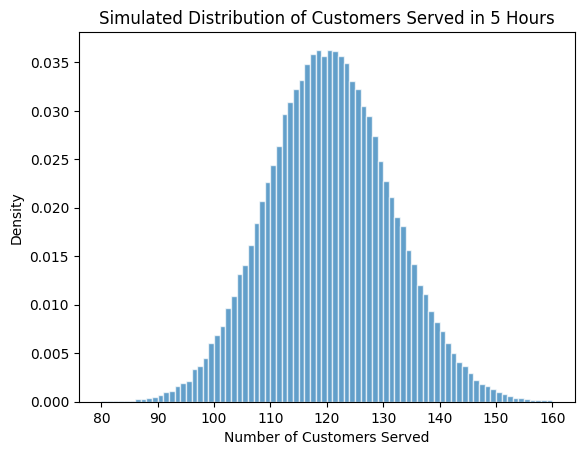

In [42]:
plt.hist(random_sample, bins=np.arange(80, 161), density=True, edgecolor='white', alpha=0.7)
plt.title('Simulated Distribution of Customers Served in 5 Hours')
plt.xlabel('Number of Customers Served')
plt.ylabel('Density')
plt.show()
# Your code for part 4g(ii) above this line

In [43]:
p100_john = np.mean(random_sample >= 100)

# Your code for part iii above this line

print('Simulated Probability that John serves 100 or more customers in a 5-hour block = {:.3f}'.format(p100_john))


# Output should match your theoretical answer to Part 4f

Simulated Probability that John serves 100 or more customers in a 5-hour block = 0.972


<!-- END QUESTION -->

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Congratulations! You have finished Homework 5!

If you discussed this assignment with any other students in the class (in a manner that is acceptable as described by the Collaboration policy above) please **include their names** here:

**Collaborators**: *list collaborators here*

### Submission Instructions

Before proceeding any further, **save this notebook.**

After running the `grader.export()` cell provided below, **2 files will be created**: a zip file and pdf file.  You can download them using the links provided below OR by finding them in the same folder where this juptyer notebook resides in your JuptyerHub.

To receive credit on this assignment, **you must submit BOTH of these files
to their respective Gradescope portals:** 

* **Homework 5 Autograded**: Submit the zip file that is output by the `grader.export()` cell below to the HW5 Autograded assignment in Gradescope.

* **Homework 5 Manually Graded**: Submit your hw05.PDF to the HW5 Manually Graded assignment in Gradescope.  **YOU MUST SELECT THE PAGES CORRESPONDING TO EACH QUESTION WHEN YOU UPLOAD TO GRADESCOPE.  IF NOT, YOU WILL LOSE POINTS**   Also, **check** that all of your plots **and** all lines of your code are showing up in your PDF before submitting.  If not, you will not receive credit for your plots/code.  


**You are responsible for ensuring your submission follows our requirements. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

AFTER running the cell below, click on <a href='hw05.pdf' download>this link to download the PDF </a> to upload to Gradescope.  There will be a separate link that appears after running the cell below with a link to download the zip file to upload to Gradescope.

In [44]:
# Save your notebook first, then run this cell to export your submission.
grader.export(run_tests=True)

/opt/conda/lib/python3.10/site-packages/otter/check/notebook.py:470: UserWarning: Could not locate a PDF to include
  warnings.warn("Could not locate a PDF to include")


ExportFailedException: There was an error generating your LaTeX; showing full error message:
    Failed to run "['xelatex', 'notebook.tex', '-quiet']" command:
    This is XeTeX, Version 3.141592653-2.6-0.999993 (TeX Live 2022/dev/Debian) (preloaded format=xelatex)
     restricted \write18 enabled.
    entering extended mode
    (./notebook.tex
    LaTeX2e <2021-11-15> patch level 1
    L3 programming layer <2022-01-21>
    (/usr/share/texlive/texmf-dist/tex/latex/base/article.cls
    Document Class: article 2021/10/04 v1.4n Standard LaTeX document class
    (/usr/share/texlive/texmf-dist/tex/latex/base/size10.clo))
    (/usr/share/texlive/texmf-dist/tex/latex/graphics/graphicx.sty
    (/usr/share/texlive/texmf-dist/tex/latex/graphics/keyval.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/graphics/graphics.sty
    (/usr/share/texlive/texmf-dist/tex/latex/graphics/trig.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/graphics.cfg)
    (/usr/share/texlive/texmf-dist/tex/latex/graphics-def/xetex.def)))
    (/usr/share/texlive/texmf-dist/tex/latex/caption/caption.sty
    (/usr/share/texlive/texmf-dist/tex/latex/caption/caption3.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/float/float.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/xcolor/xcolor.sty
    (/usr/share/texlive/texmf-dist/tex/latex/graphics-cfg/color.cfg))
    (/usr/share/texlive/texmf-dist/tex/latex/tools/enumerate.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/geometry/geometry.sty
    (/usr/share/texlive/texmf-dist/tex/generic/iftex/ifvtex.sty
    (/usr/share/texlive/texmf-dist/tex/generic/iftex/iftex.sty)))
    (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsmath.sty
    For additional information on amsmath, use the `?' option.
    (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amstext.sty
    (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsgen.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsbsy.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/amsmath/amsopn.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amssymb.sty
    (/usr/share/texlive/texmf-dist/tex/latex/amsfonts/amsfonts.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/base/textcomp.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/upquote/upquote.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/eurosym/eurosym.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.sty
    (/usr/share/texlive/texmf-dist/tex/latex/l3packages/xparse/xparse.sty
    (/usr/share/texlive/texmf-dist/tex/latex/l3kernel/expl3.sty
    (/usr/share/texlive/texmf-dist/tex/latex/l3backend/l3backend-xetex.def
    (|extractbb --version))))
    (/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec-xetex.sty
    (/usr/share/texlive/texmf-dist/tex/latex/base/fontenc.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/fontspec/fontspec.cfg)))
    (/usr/share/texlive/texmf-dist/tex/latex/unicode-math/unicode-math.sty
    (/usr/share/texlive/texmf-dist/tex/latex/unicode-math/unicode-math-xetex.sty
    (/usr/share/texlive/texmf-dist/tex/latex/l3packages/l3keys2e/l3keys2e.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/base/fix-cm.sty
    (/usr/share/texlive/texmf-dist/tex/latex/base/ts1enc.def))
    (/usr/share/texlive/texmf-dist/tex/latex/unicode-math/unicode-math-table.tex)))
    (/usr/share/texlive/texmf-dist/tex/latex/fancyvrb/fancyvrb.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/grffile/grffile.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/adjustbox/adjustbox.sty
    (/usr/share/texlive/texmf-dist/tex/latex/xkeyval/xkeyval.sty
    (/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkeyval.tex
    (/usr/share/texlive/texmf-dist/tex/generic/xkeyval/xkvutils.tex)))
    (/usr/share/texlive/texmf-dist/tex/latex/adjustbox/adjcalc.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/adjustbox/trimclip.sty
    (/usr/share/texlive/texmf-dist/tex/latex/collectbox/collectbox.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/adjustbox/tc-xetex.def))
    (/usr/share/texlive/texmf-dist/tex/latex/ifoddpage/ifoddpage.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/varwidth/varwidth.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref.sty
    (/usr/share/texlive/texmf-dist/tex/generic/ltxcmds/ltxcmds.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/pdftexcmds/pdftexcmds.sty
    (/usr/share/texlive/texmf-dist/tex/generic/infwarerr/infwarerr.sty))
    (/usr/share/texlive/texmf-dist/tex/generic/kvsetkeys/kvsetkeys.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/kvdefinekeys/kvdefinekeys.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/pdfescape/pdfescape.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/hycolor/hycolor.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/letltxmacro/letltxmacro.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/auxhook/auxhook.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/kvoptions/kvoptions.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/pd1enc.def)
    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/hyperref-langpatches.def)
    (/usr/share/texlive/texmf-dist/tex/generic/intcalc/intcalc.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/etexcmds/etexcmds.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/puenc.def)
    (/usr/share/texlive/texmf-dist/tex/latex/url/url.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/bitset/bitset.sty
    (/usr/share/texlive/texmf-dist/tex/generic/bigintcalc/bigintcalc.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/base/atbegshi-ltx.sty))
    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/hxetex.def
    (/usr/share/texlive/texmf-dist/tex/generic/stringenc/stringenc.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/rerunfilecheck/rerunfilecheck.sty
    (/usr/share/texlive/texmf-dist/tex/latex/base/atveryend-ltx.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/uniquecounter/uniquecounter.sty)))
    (/usr/share/texlive/texmf-dist/tex/latex/titling/titling.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/tools/longtable.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/booktabs/booktabs.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/tools/array.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/tools/calc.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/enumitem/enumitem.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/ulem/ulem.sty)
    (/usr/share/texlive/texmf-dist/tex/latex/jknapltx/mathrsfs.sty)
    No file notebook.aux.
    (/usr/share/texlive/texmf-dist/tex/latex/caption/ltcaption.sty)
    *geometry* driver: auto-detecting
    *geometry* detected driver: xetex

    Package geometry Warning: The marginal notes overrun the paper.
         Add 3.73001pt and more to the right margin.

    *geometry* verbose mode - [ preamble ] result:
    * driver: xetex
    * paper: <default>
    * layout: <same size as paper>
    * layoutoffset:(h,v)=(0.0pt,0.0pt)
    * modes: 
    * h-part:(L,W,R)=(72.26999pt, 469.75502pt, 72.26999pt)
    * v-part:(T,H,B)=(72.26999pt, 650.43001pt, 72.26999pt)
    * \paperwidth=614.295pt
    * \paperheight=794.96999pt
    * \textwidth=469.75502pt
    * \textheight=650.43001pt
    * \oddsidemargin=0.0pt
    * \evensidemargin=0.0pt
    * \topmargin=-37.0pt
    * \headheight=12.0pt
    * \headsep=25.0pt
    * \topskip=10.0pt
    * \footskip=30.0pt
    * \marginparwidth=65.0pt
    * \marginparsep=11.0pt
    * \columnsep=10.0pt
    * \skip\footins=9.0pt plus 4.0pt minus 2.0pt
    * \hoffset=0.0pt
    * \voffset=0.0pt
    * \mag=1000
    * \@twocolumnfalse
    * \@twosidefalse
    * \@mparswitchfalse
    * \@reversemarginfalse
    * (1in=72.27pt=25.4mm, 1cm=28.453pt)

    (/usr/share/texlive/texmf-dist/tex/latex/hyperref/nameref.sty
    (/usr/share/texlive/texmf-dist/tex/latex/refcount/refcount.sty)
    (/usr/share/texlive/texmf-dist/tex/generic/gettitlestring/gettitlestring.sty))

    Package hyperref Warning: Rerun to get /PageLabels entry.

    (/usr/share/texlive/texmf-dist/tex/latex/amsfonts/umsa.fd)
    (/usr/share/texlive/texmf-dist/tex/latex/amsfonts/umsb.fd)
    (/usr/share/texlive/texmf-dist/tex/latex/jknapltx/ursfs.fd)

    Package longtable Warning: Column widths have changed
    (longtable)                in table 1 on input line 357.

    Missing character: There is no ∑ (U+2211) in font [lmroman10-regular]:mapping=t
    ex-text;!
    [1] [2] [3] [4] [5] [6]

    ! LaTeX Error: \symbballowed only in math mode.

    See the LaTeX manual or LaTeX Companion for explanation.
    Type  H <return>  for immediate help.
     ...                                              
                                                  
    l.583 numbers. The expected winnings ( \mathbb
                                                  {E}{[}Y{]} ) for a single spin
    ? 
    ! Emergency stop.
     ...                                              
                                                  
    l.583 numbers. The expected winnings ( \mathbb
                                                  {E}{[}Y{]} ) for a single spin
    Output written on notebook.pdf (6 pages).
    Transcript written on notebook.log.
